In [ ]:
import tensorflow as tf

#Initialization of Tensors
x = tf.constant(4,shape=(1,1),dtype=tf.float32) #shape syntax(x,y) == dimensions, dtype == unit
x = tf.constant([[1,2,3],[4,5,6]])

x = tf.ones((3,3))
x = tf.zeros((2,3))
x = tf.eye(3) #I for the identity matrix (eye)
x = tf.random.normal((3,3), mean=0, stddev=1) #Standard Normal Distribution & metrics
x = tf.random.uniform((1,3), minval=0, maxval=1) #Have values between 0 and 1
x = tf.range(start=1, limit=10, delta=2) #Start at 1, increase step by delta => [start, start+delta until limit]
x = tf.cast(x, dtype=tf.float64)

print(x)

#Mathematical Operations
x = tf.constant([1,2,3])
y = tf.constant([9,8,7])

#Pairwise operations:
z = tf.add(x,y) #z = x + y
z = tf.subtract(x,y) #z = x - y
z = tf.divide(x,y) #z = x / y
z = tf.multiply(x,y) #z = x * y

#pairwise multiplication and then a summation of values
z = tf.tensordot(x,y, axes=1) #z = tf.reduce_sum(x*y,axis=0)

z = x ** 5 #scale by constant

x = tf.random.normal((2,3))
y = tf.random.normal((3,4))

# pairwise multiplication
z = tf.matmul(x,y) #z = x @ y
print(z)

#Indexing
x = tf.constant([0,1,1,2,3,1,2,3])
print(x[:]) #prints all of the set
print(x[1:]) #prints all of the set except the last element

print(x[1:3]) #third element not inclusive (1,3]
print(x[::2]) #prints every other number, step distance == 2
print(x[::-1]) #prints in reverse order, with step distance == 1

indices = tf.constant([0,3]) 
x_ind = tf.gather(x,indices) #extract values at the specified indicies from matrix x
print(x_ind)

x = tf.constant([[1,2],
                [3,4],
                [5,6]])
print(x[0,:]) # x[0] == prints all the values in first vector
print(x[0:2,:]) #prints all the values in first two vector

#Reshaping
x = tf.range(9)
print(x)

x = tf.reshape(x,(3,3)) #changes the vector into a matrix with the given dimensions
print(x)

x = tf.transpose(x, perm=[1,0]) #perm(1,0) converts the rows to columns and vice versa
print(x)



2021-09-27 19:59:15.235514: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-27 19:59:15.235569: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-09-27 19:59:25.880388: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-27 19:59:25.884035: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-27 19:59:25.884063: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-27 19:59:25.884083: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

Instructions for updating:
non-resource variables are not supported in the long term
2021-09-27 19:59:30.478218: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-27 19:59:30.480890: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-09-27 19:59:30.490113: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499990000 Hz
Epoch: 0050 error= 86.006935120 W= 0.354869 b= 2.9841974
Epoch: 0100 error= 68.701316833 W= 0.25485182 b= 5.64286
Epoch: 0150 error= 54.934597015 W= 0.16564226 b= 8.014235
Epoch: 0200 error= 43.983203888 W= 0.08607241 b= 10.129365
Epoch: 0250 error= 35.271408081 W= 0.01510004 b= 12.015956
Epoch: 0300 error= 28.341367722 W= -0.04820286 b= 13.698678
Epoch: 0350 error= 22.828701019 W= -0.10466567 b= 15.199575
Epoch: 0400 error= 18.443685532 W= -0.1550261 b= 16.53826
Epoch: 0450 error= 14.955580711 

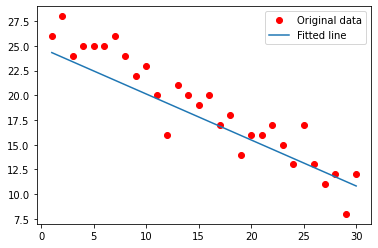

Testing... (Mean square loss Comparison)
Testing error= 1.6383076
Absolute mean square loss difference: 0.8508506


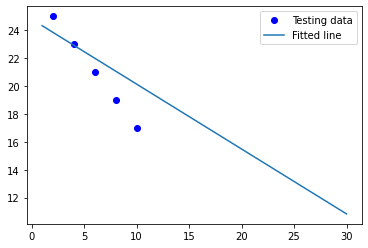

In [ ]:
# https://www.youtube.com/watch?v=2BusGJyn77E

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy
import pandas as pd
import matplotlib.pyplot as plt

#Getting the data
spreadsheet = 'archive/LR_ML.xlsx'
data = pd.read_excel(spreadsheet)

months = data['Machine Age (Months)'].values
MTBF = data['Mean Time Between Failure (Days)'].values

train_X = numpy.asarray(months)
train_Y = numpy.asarray(MTBF)

#hyperparameters
learning_rate = 0.01
training_epochs = 1000

#parameter
display_step = 50 #used for visualization, not by the model

n_samples = train_X.shape[0]

X = tf.placeholder('float')
Y = tf.placeholder('float')

rng = numpy.random
W = tf.Variable(rng.randn(), name="Weight")
b = tf.Variable(rng.randn(), name='bias')

pred = tf.add(tf.multiply(X,W),b) # linear model equation: y^ = x*W + b

        # summation
error = tf.reduce_sum(tf.pow(pred-Y,2)) / (2*n_samples) #Mean sqared error

#gradient descent == type of training algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error) #configures model to use gradient descent algo

init = tf.global_variables_initializer() #initialized any tf.variables https://stackoverflow.com/questions/44433438/what-is-the-purpose-of-tf-global-variables-initializer

# Start training
with tf.Session() as sess: #handles cleanup of tf.Session() resources https://preshing.com/20110920/the-python-with-statement-by-example/

    # Run the initializer
    sess.run(init) # load variables

    # Fit all training data
    for epoch in range(training_epochs): # 1 - 1000

        #for i = 0 i < train_x.size
        #    sess.run(optimizer, feed_dict={X:train_X[i], Y: train_Y[i]}))

        #pairwise list, for each element in this list
        for (x, y) in zip(train_X, train_Y): #((train_X[0],train_Y[0]),(train_X[1],train_Y[1],...))
            sess.run(optimizer, feed_dict={X: x, Y: y}) #feed model our data sets

        # Display logs per epoch step        
        if (epoch+1) % display_step == 0:
            c = sess.run(error, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "error=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_error = sess.run(error, feed_dict={X: train_X, Y: train_Y})
    print("Training error=", training_error, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([2,4,6,8,10])
    test_Y = numpy.asarray([25,23,21,19,17])

    print("Testing... (Mean square loss Comparison)")
    testing_error = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing error=", testing_error)
    print("Absolute mean square loss difference:", abs(
        training_error - testing_error))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    

![Picture title](image-20210919-204224.png)

![Picture title](image-20210919-202333.png)

![Picture title](image-20210919-202318.png)

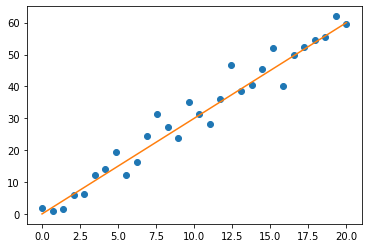

2021-09-27 19:59:37.067255: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
epoch: 0000 c=48.9531 w=2.2644 b=0.2729
epoch: 0020 c=7.0068 w=3.0342 b=0.3479
epoch: 0040 c=7.0063 w=3.0336 b=0.3571
epoch: 0060 c=7.0057 w=3.0330 b=0.3659
epoch: 0080 c=7.0053 w=3.0325 b=0.3742
epoch: 0100 c=7.0048 w=3.0320 b=0.3821
epoch: 0120 c=7.0044 w=3.0315 b=0.3896
epoch: 0140 c=7.0041 w=3.0310 b=0.3967
epoch: 0160 c=7.0037 w=3.0306 b=0.4035
epoch: 0180 c=7.0034 w=3.0302 b=0.4099


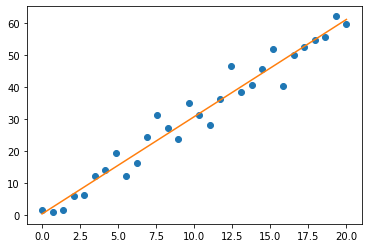

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

learning_rate =0.01
epochs=200
n_samples = 30
train_x = np.linspace(0,20,n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(np.random.randn(),name="tIM_GeY")
B = tf.Variable(np.random.randn(),name="wHY_RayMod_Slepr")

pred = tf.add(tf.multiply(X,W),B) #X * W + B

cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        for x,y in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        if not epoch%20:
            c = sess.run(cost, feed_dict={X: train_x, Y: train_y})
            w = sess.run(W)
            b = sess.run(B)
            print(f'epoch: {epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')

    weight = sess.run(W)
    bias = sess.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)
    plt.show()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c58af11-5d4f-40f3-a808-e868f2c28485' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>